In [1]:
!pip install Prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import timedelta

In [7]:

data = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv')
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-7-41bedee6fcf3>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [8]:


service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

forecast_dict = {}

for service in service_columns:
    df_service = data[['Date', service]].rename(columns={'Date': 'ds', service: 'y'})

    model = Prophet(daily_seasonality=True, yearly_seasonality=False)

    model.fit(df_service)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    forecast_dict[service] = forecast

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6zi8159/4s1e09nu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6zi8159/2e2w962i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22573', 'data', 'file=/tmp/tmpk6zi8159/4s1e09nu.json', 'init=/tmp/tmpk6zi8159/2e2w962i.json', 'output', 'file=/tmp/tmpk6zi8159/prophet_modelf62g20ap/prophet_model-20241128063244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6zi8159/9gfne7p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6zi8159/mz9wf7dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

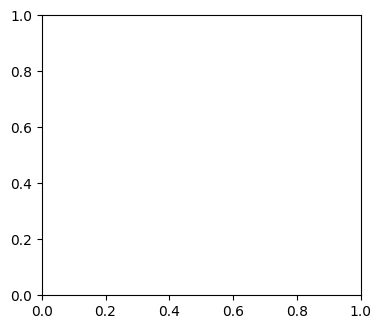

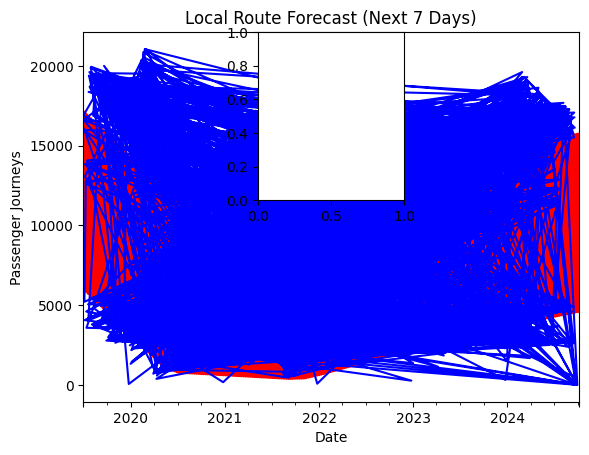

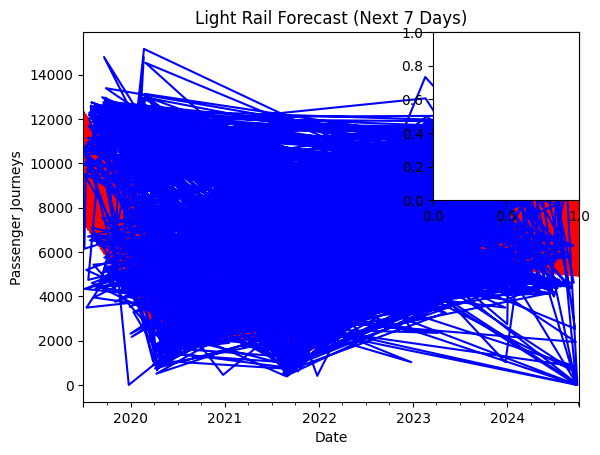

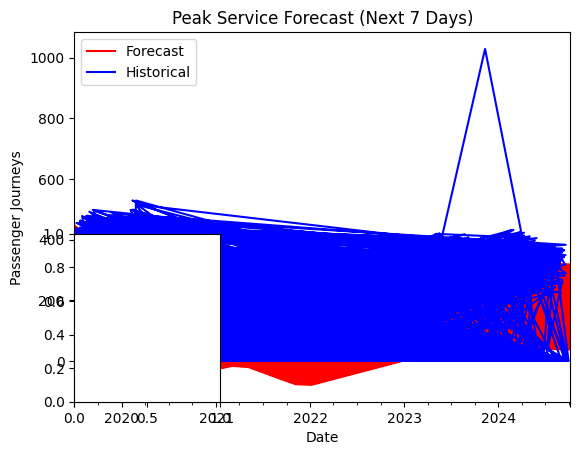

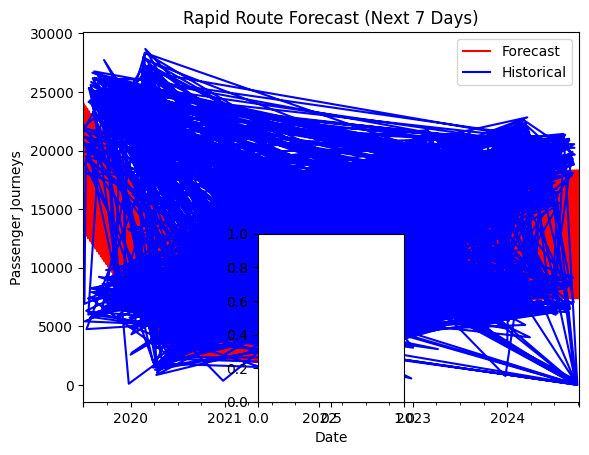

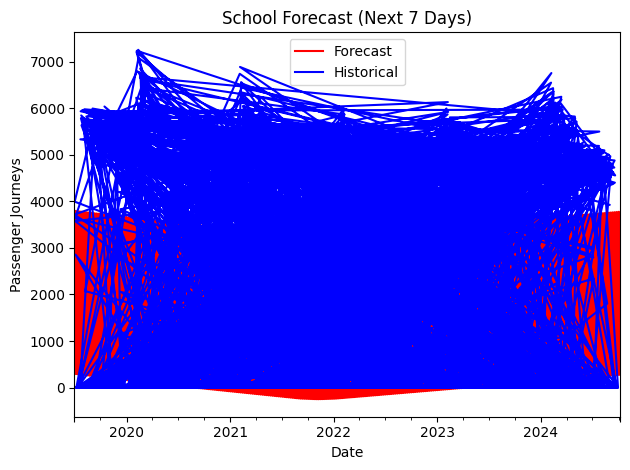

In [10]:
plt.figure(figsize=(14, 8))

for i, service in enumerate(service_columns, 1):
    plt.subplot(2, 3, i)
    forecast_dict[service].plot(x='ds', y='yhat', label='Forecast', color='red')
    plt.plot(data['Date'], data[service], label='Historical', color='blue')

    plt.title(f'{service} Forecast (Next 7 Days)')
    plt.xlabel('Date')
    plt.ylabel('Passenger Journeys')
    plt.legend()

plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Evaluation Metrics:

Service: Local Route
MAE: 6472.65
RMSE: 7912.61

Service: Light Rail
MAE: 3475.71
RMSE: 4229.27

Service: Peak Service
MAE: 168.41
RMSE: 203.68

Service: Rapid Route
MAE: 7082.73
RMSE: 8578.09

Service: School
MAE: 2512.74
RMSE: 2947.27


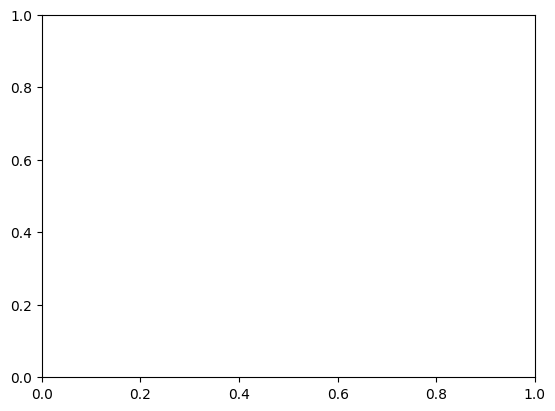

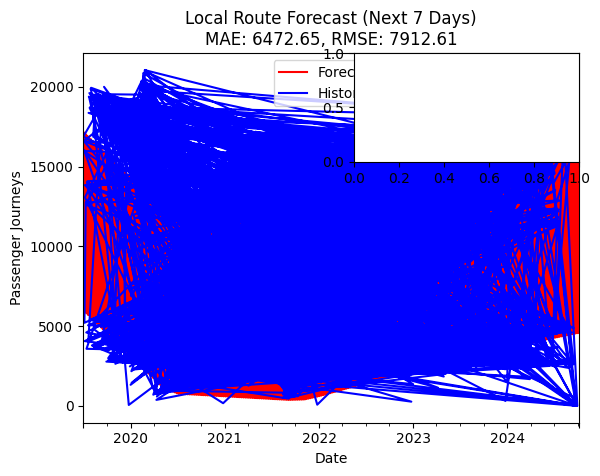

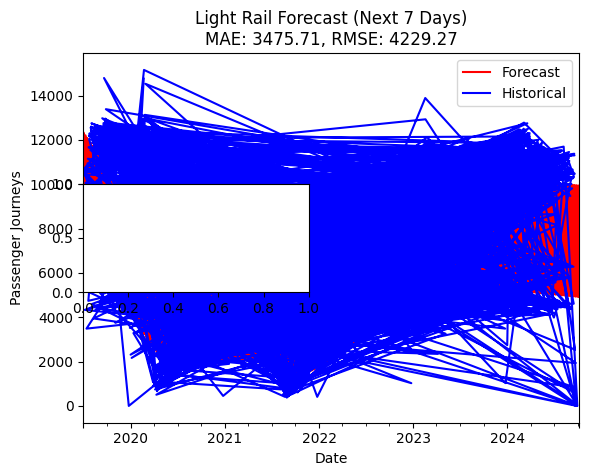

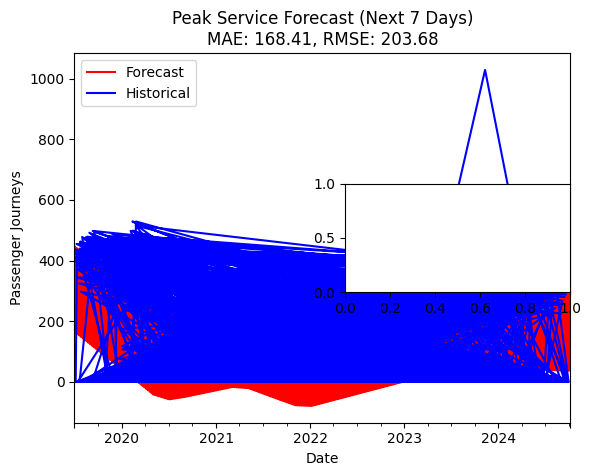

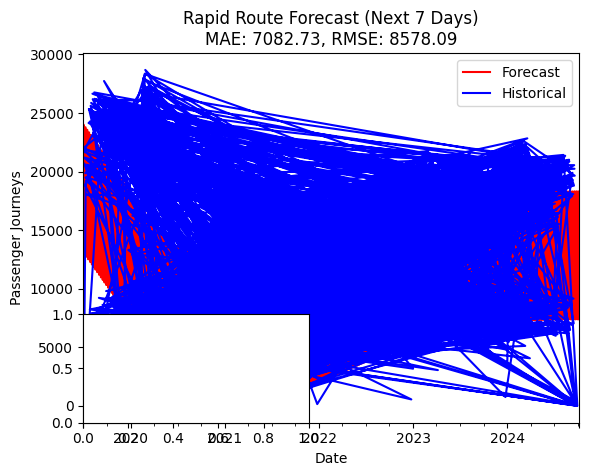

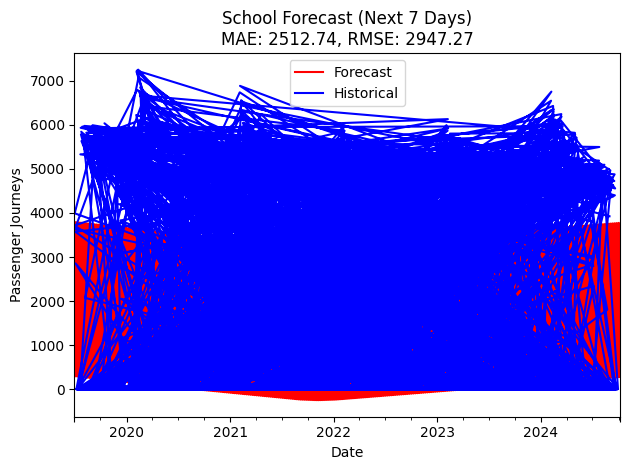

In [19]:
evaluation_results = {}

for service in service_columns:
    forecast = forecast_dict[service]

    forecast_eval = forecast[forecast['ds'] <= data['Date'].max()]

    y_true = data[service][:len(forecast_eval)]
    y_pred = forecast_eval['yhat']

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    evaluation_results[service] = {'MAE': mae, 'RMSE': rmse}

print("Evaluation Metrics:")
for service, metrics in evaluation_results.items():
    print(f"\nService: {service}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")

plt.figure(figsize=(14, 16))

for i, service in enumerate(service_columns, 1):
    plt.subplot(3, 2, i)
    forecast_dict[service].plot(x='ds', y='yhat', label='Forecast', color='red')
    plt.plot(data['Date'], data[service], label='Historical', color='blue')

    mae = evaluation_results[service]['MAE']
    rmse = evaluation_results[service]['RMSE']
    plt.title(f'{service} Forecast (Next 7 Days)\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Passenger Journeys')
    plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Evaluation Metrics:

Service: Local Route
MAE: 6472.65
RMSE: 7912.61

Service: Light Rail
MAE: 3475.71
RMSE: 4229.27

Service: Peak Service
MAE: 168.41
RMSE: 203.68

Service: Rapid Route
MAE: 7082.73
RMSE: 8578.09

Service: School
MAE: 2512.74
RMSE: 2947.27


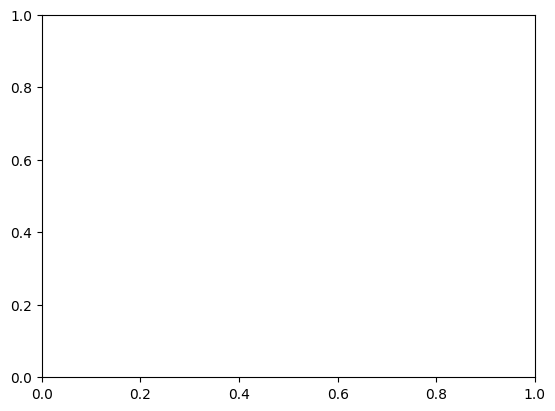

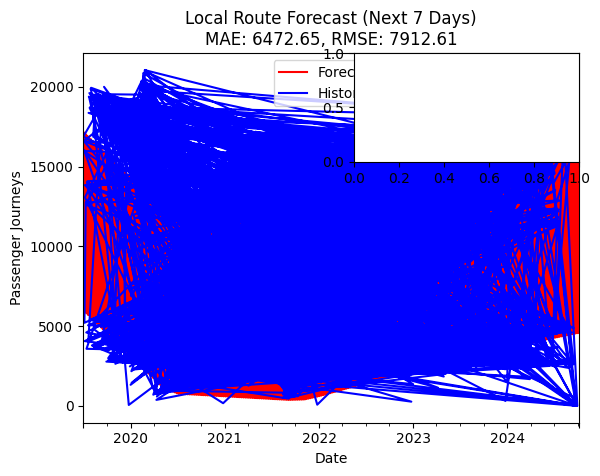

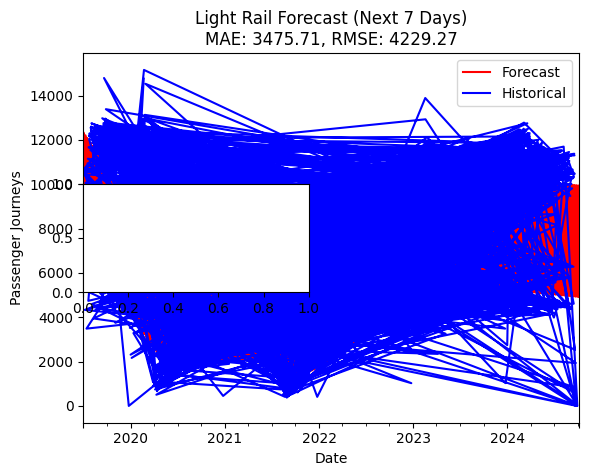

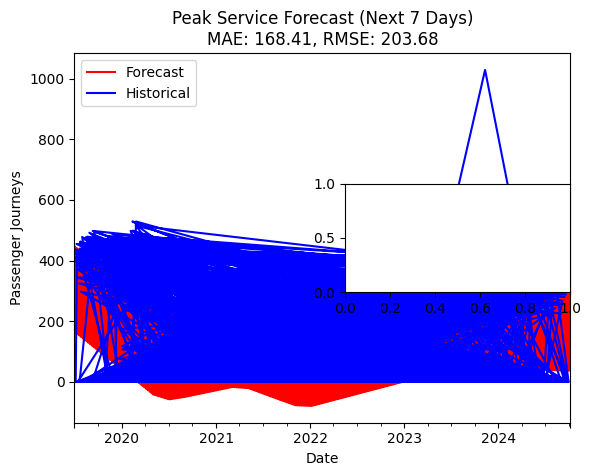

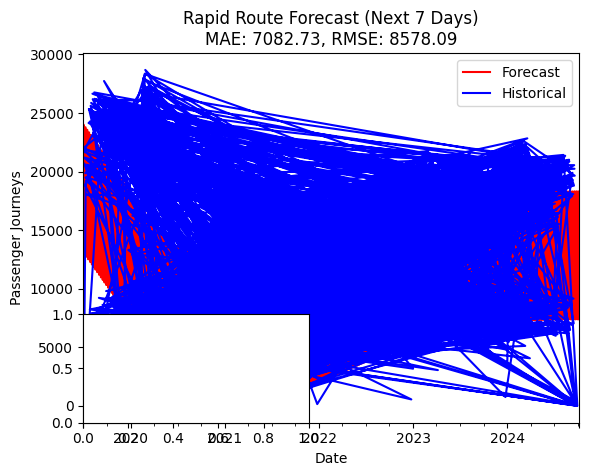

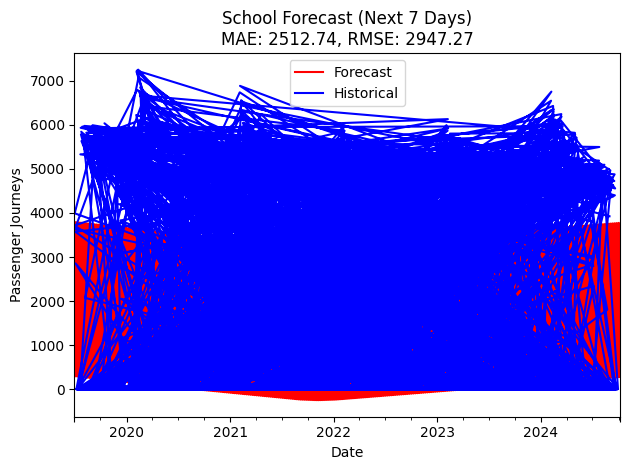